<a href="https://colab.research.google.com/github/brunocostaar/brunocostaar/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Respostas_Aula_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparando o ambiente

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

### Carregando os dados

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Dimensões do conjunto de treinamento: (50000, 32, 32, 3)
Dimensões do conjunto de teste: (10000, 32, 32, 3)


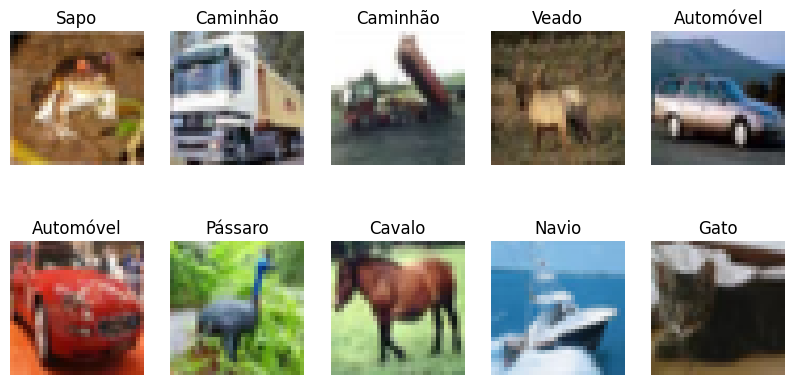

In [ ]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Mostrando o tamanho do dataset (dimensão)
print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

# Classes presentes no dataset
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Veado', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

### Separando os dados entre treino e teste

In [ ]:
# Essa parte serve mais para a normalização dos dados, pois estamos tratando de imagens nesse exemplo
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Construindo o modelo de CNN
# A estrutura do modelo é a seguinte:
# 1. Camada de convolução com 32 filtros de 3x3 e função de ativação ReLU
# 2. Camada de MaxPooling de 2x2
# 3. Camada de convolução com 64 filtros de 3x3 e função de ativação ReLU
# 4. Camada de MaxPooling de 2x2
# 5. Camada de convolução com 128 filtros de 3x3 e função de ativação ReLU
# 6. Camada de Flatten: transforma a matriz em um vetor (imagens 2D para 1D)
# 7. Camada Dense (128 neurônios) com função de ativação ReLU (camada oculta)
# 8. Dropout de 50%: zera 50% dos valores de entrada, evitando overfitting
# 9. Camada Dense (10 neurônios) com função de ativação softmax (camada de saída)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Para evitar overfitting
    Dense(10, activation='softmax')
])

# Resumo do modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 100ms/step - accuracy: 0.2727 - loss: 1.9358 - val_accuracy: 0.5075 - val_loss: 1.3721
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 95ms/step - accuracy: 0.4861 - loss: 1.4225 - val_accuracy: 0.5440 - val_loss: 1.2559
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.5608 - loss: 1.2357 - val_accuracy: 0.6019 - val_loss: 1.1239
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.5950 - loss: 1.1424 - val_accuracy: 0.6324 - val_loss: 1.0438
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.6348 - loss: 1.0496 - val_accuracy: 0.6601 - val_loss: 0.9758
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 97ms/step - accuracy: 0.6626 - loss: 0.9660 - val_accuracy: 0.6773 - val_loss: 0.9306
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.6848 - loss: 0.9058 - val_accuracy: 0.6859 - val_loss: 0.9093
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.7092 - loss: 0.8422 -

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 4s - 14ms/step - accuracy: 0.7113 - loss: 0.8544
Acurácia no conjunto de teste: 71.13%


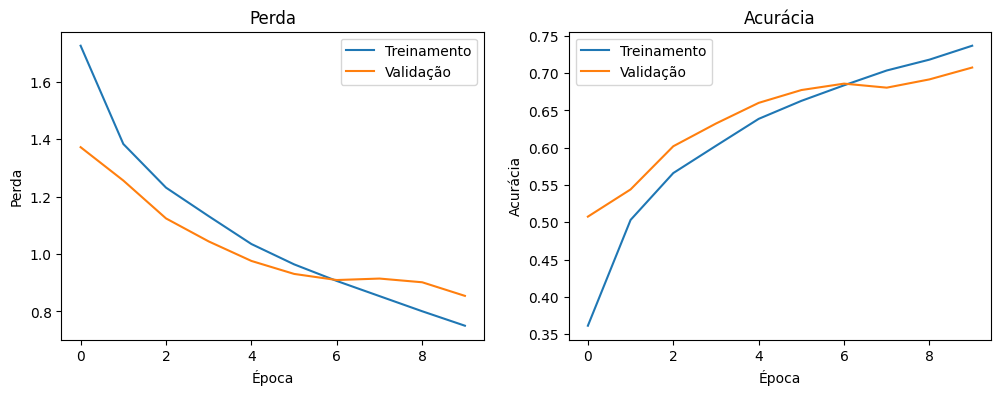

In [ ]:
# Plotar perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

### Agora, vamos testar usando data augmentation

In [ ]:
# Isso é um simples exemplo de como podemos aumentar o dataset, no caso, estamos aumentando as imagens
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Aplicando tudo
datagen.fit(X_train)

# Agora, vamos retreinar o modelo usando o conjunto de dados novo e ver se houve alguma mudança
model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 128ms/step - accuracy: 0.5277 - loss: 1.3530 - val_accuracy: 0.6838 - val_loss: 0.9327
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 127ms/step - accuracy: 0.5635 - loss: 1.2485 - val_accuracy: 0.6656 - val_loss: 0.9757
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.5874 - loss: 1.1956 - val_accuracy: 0.6449 - val_loss: 1.0337
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.5899 - loss: 1.1819 - val_accuracy: 0.7075 - val_loss: 0.8413
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.5994 - loss: 1.1566 - val_accuracy: 0.6950 - val_loss: 0.8908
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.6093 - loss: 1.1321 - val_accuracy: 0.6890 - val_loss: 0.9135
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.6179 - loss: 1.0997 - val_accuracy: 0.6910 - val_loss: 0.8878
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 127ms/step - accuracy: 0.6252 - loss: 1.0838

In [ ]:
# Novamente, devemos avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 4s - 13ms/step - accuracy: 0.7032 - loss: 0.8648
Acurácia no conjunto de teste: 70.32%


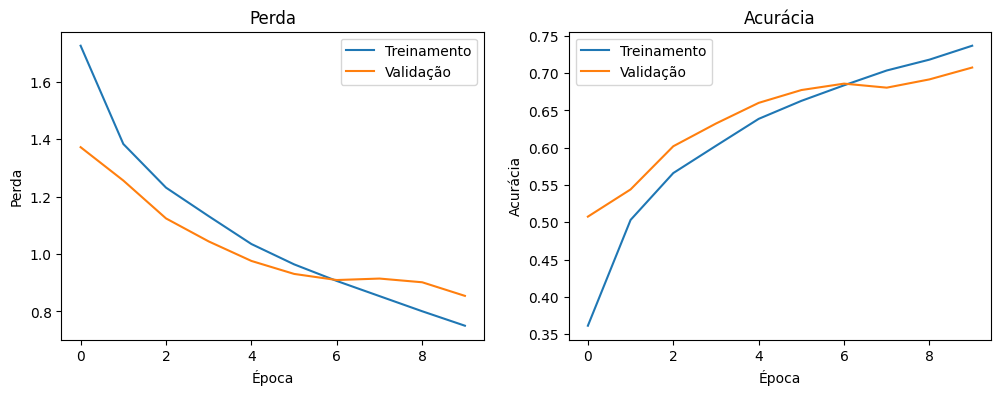

In [ ]:
# Plotando os gráficos de perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

# Agora é a sua vez de fazer uma rede de aprendizado profundo usando o dataset
## [Fashion-Mnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import numpy as np

Dimensões do conjunto de treinamento: (60000, 28, 28, 1)
Dimensões do conjunto de teste: (10000, 28, 28, 1)


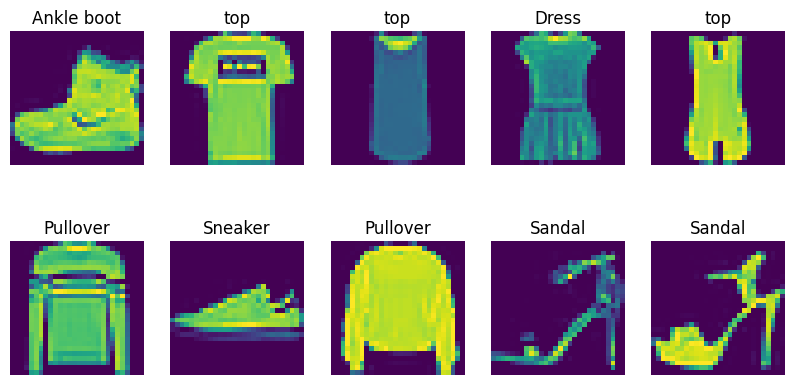

In [ ]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Mostrando o tamanho do dataset (dimensão)
print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

# Classes presentes no dataset
classes = ['top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Essa parte serve mais para a normalização dos dados, pois estamos tratando de imagens nesse exemplo
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Construindo o modelo de CNN
# A estrutura do modelo é a seguinte:
# 1. Camada de convolução com 32 filtros de 3x3 e função de ativação ReLU
# 2. Camada de MaxPooling de 2x2
# 3. Camada de convolução com 64 filtros de 3x3 e função de ativação ReLU
# 4. Camada de MaxPooling de 2x2
# 5. Camada de convolução com 128 filtros de 3x3 e função de ativação ReLU
# 6. Camada de Flatten: transforma a matriz em um vetor (imagens 2D para 1D)
# 7. Camada Dense (128 neurônios) com função de ativação ReLU (camada oculta)
# 8. Dropout de 50%: zera 50% dos valores de entrada, evitando overfitting
# 9. Camada Dense (10 neurônios) com função de ativação softmax (camada de saída)

model = Sequential([
    Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(56, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(112, (3, 3), activation='relu'),
    Flatten(),
    Dense(112, activation='relu'),
    Dropout(0.5),  # Para evitar overfitting
    Dense(10, activation='softmax')
])

# Resumo do modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 112)           │          56,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1008)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 112)                 │         113,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,146 (723.23 KB)

 Trainable params: 185,146 (723.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6502 - loss: 0.9630 - val_accuracy: 0.8386 - val_loss: 0.4353
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.8306 - loss: 0.4684 - val_accuracy: 0.8692 - val_loss: 0.3538
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8670 - loss: 0.3804 - val_accuracy: 0.8778 - val_loss: 0.3259
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8803 - loss: 0.3387 - val_accuracy: 0.8954 - val_loss: 0.2885
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.8980 - loss: 0.2922 - val_accuracy: 0.8947 - val_loss: 0.2843
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9042 - loss: 0.2707 - val_accuracy: 0.9027 - val_loss: 0.2610
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9095 - loss: 0.2532 - val_accuracy: 0.9068 - val_loss: 0.2549
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9172 - loss: 0.2331 - 

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 2s - 7ms/step - accuracy: 0.9071 - loss: 0.2730
Acurácia no conjunto de teste: 90.71%


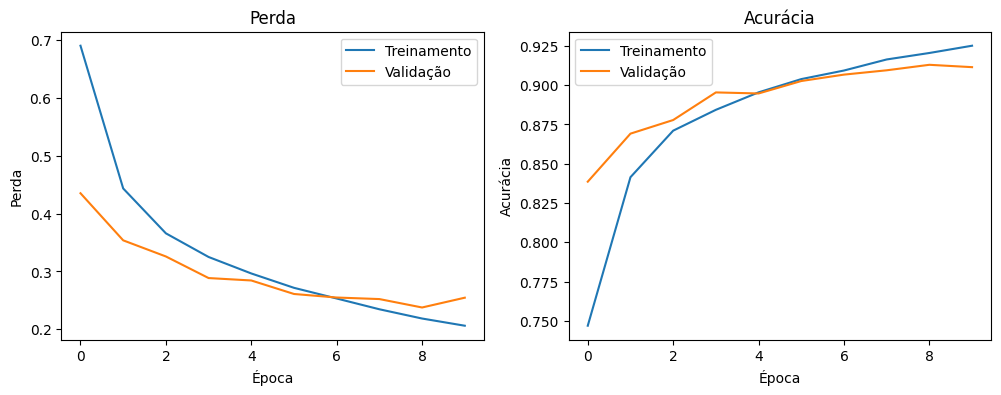

In [ ]:
# Plotar perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [ ]:
#Usando data augmentation para aumentar as imagens e ver se há diferença no resultado.
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,     # Rotações diminuidas, o Gemini sugeriu que seriam mais efetivas para esse dataset
    horizontal_flip=False     # Setado para false, como sapatos de pe direito sao diferentes de pe esquerdo sao diferentes, o flip poderia influenciar negativamente
)

# Aplicando tudo
datagen.fit(X_train)

# Retreinando o modelo usando o novo conjunto de dados.
model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.8165 - loss: 0.4972 - val_accuracy: 0.8933 - val_loss: 0.2847
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.8513 - loss: 0.4077 - val_accuracy: 0.8945 - val_loss: 0.2937
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.8675 - loss: 0.3679 - val_accuracy: 0.8988 - val_loss: 0.2804
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 66ms/step - accuracy: 0.8718 - loss: 0.3523 - val_accuracy: 0.8987 - val_loss: 0.2747
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.8778 - loss: 0.3357 - val_accuracy: 0.9026 - val_loss: 0.2630
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.8800 - loss: 0.3295 - val_accuracy: 0.8896 - val_loss: 0.2967
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.8840 - loss: 0.3216 - val_accuracy: 0.8981 - val_loss: 0.2794
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.8851 - loss: 0.3115 - val_accurac

In [ ]:
# Novamente, devemos avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 2s - 7ms/step - accuracy: 0.9024 - loss: 0.2695
Acurácia no conjunto de teste: 90.24%


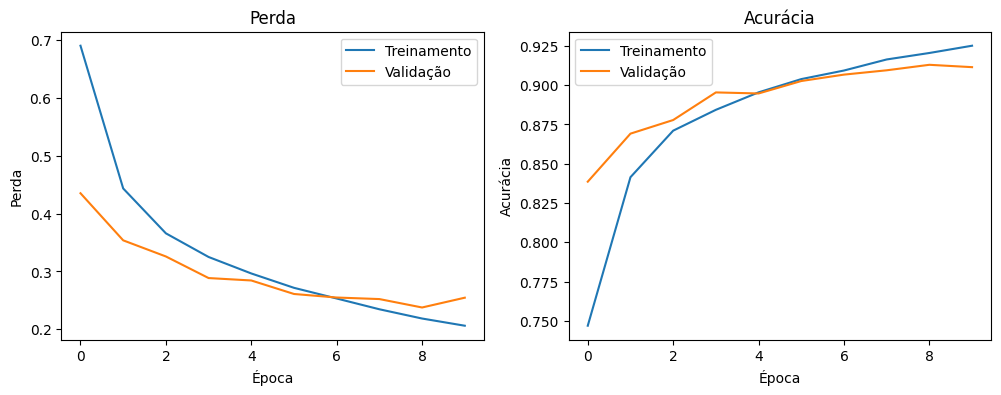

In [ ]:
# Plotando os gráficos de perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()